# CaImAn Python API

This notebook demonstrates basic use of the custom __CaImAn Python API__ for simple two-photon data analysis. 

To download CaImAn, see https://github.com/flatironinstitute/CaImAn.

Code and examples made by Antoine Légaré for PDK Lab.

In [1]:
from caimanAPI import *
import matplotlib.pyplot as plt
from scipy.stats import zscore

/home/tonepone/anaconda3/envs/caiman/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tonepone/anaconda3/envs/caiman/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tonepone/anaconda3/envs/caiman/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tonepone/anaconda3/envs/caiman/lib

### Example: Single Movie

The user first has to provide a path to a folder which contains the movie in `.tif` format, where all output files will also be written. The name of the input file must also be specified separately from the path.

In [3]:
path = '/home/tonepone/Documents/CaimanTest/'
file = 'demo.tif'

A `CaImAn` object is then created with the `path` and `file` as input arguments.

In [4]:
caiman = CaImAn(path, file)

A set of **default parameters** is already included in the `CaImAn` class. The user is encouraged to modify these values from within the `caiman.py` file to better suit the data.

Motion correction is performed directly after creating the object. The `rigid` boolean argument is set to `False` by default, so that piecewise motion correction is used. For faster results (for instance, if using already motion-corrected films), set `rigid` to `True`.

In [5]:
caiman.correctMotion(rigid=False)

Normally, CaImAn doest not save the motion corrected films. In the present case, the film can be saved as a 16-bit `.tif` file.

In [6]:
caiman.saveFilm('corrected.tif')

100%|██████████| 1/1 [00:00<00:00,  7.64it/s]


Once the film has been motion corrected, CNMF segmentation can be performed by using the function below.

In [7]:
caiman.computeSegmentation()

/home/tonepone/anaconda3/envs/caiman/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/tonepone/anaconda3/envs/caiman/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/tonepone/anaconda3/envs/caiman/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/tonepone/anaconda3/envs/caiman/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % ma

/home/tonepone/anaconda3/envs/caiman/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/tonepone/anaconda3/envs/caiman/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/tonepone/anaconda3/envs/caiman/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/tonepone/anaconda3/envs/caiman/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % ma

USING MODEL:/home/tonepone/caiman_data/model/cnn_model.json
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


490/490 [==============================] - 0s 653us/sample


The segmentation results must then be saved in a `.hdf5` file, which respect a `name<tag>.extension` format using the `tag` argument.

Optional boolean arguments:
- `components`: sparse matrix which contains all the individual spatial components stored in column format. (**True** by default)
- `image`: image of all segmented components. (**True** by default)
- `default`: output the default CaImAn .hdf5 file which contains all the parameters used and more. The default CaImAn output is not compatible with the `CaimanResults` class used below. (**False** by default)

In [8]:
caiman.saveResults()

After running the segmentation, the `.mmap` files used for computation can be deleted. **Warning**: this function deletes all `.mmap` files present in the directory. Make sure you perform this in a dedicated folder to avoid deleting other important files.

In [9]:
caiman.deleteMemoryMappedFiles()

Finally, the cluster is stopped.

In [10]:
caiman.stopCluster()

### Example: Results

Results can be loaded using the `loadResults` method of the `CaImAn` class. By default, the output of this code is a simplified version of the default CaImAn output, which contains the following attributes:
- `timeSeries`: the dF/F fluorescence time series
- `deconvolved`: the deconvolved and denoised fluorescence time series
- `spikes`: the spikes used to generate the deconvolved series
- `SNR`: the signal to noise ratio of every component
- `centroids`: the XY coordinates of every component in the film
- `labels`: an image with integer patches corresponding to segmented neurons
- `averageFrame`: the mean-intensity temporal projection of the movie

In [11]:
file = 'results.hdf5'
path = '/home/tonepone/Documents/CaimanTest/'

In [12]:
results = CaImAn.loadResults(path + file)

First, let's project the centroids onto the average frame to pinpoint which neurons have been identified.

(-0.5, 199.5, 199.5, -0.5)

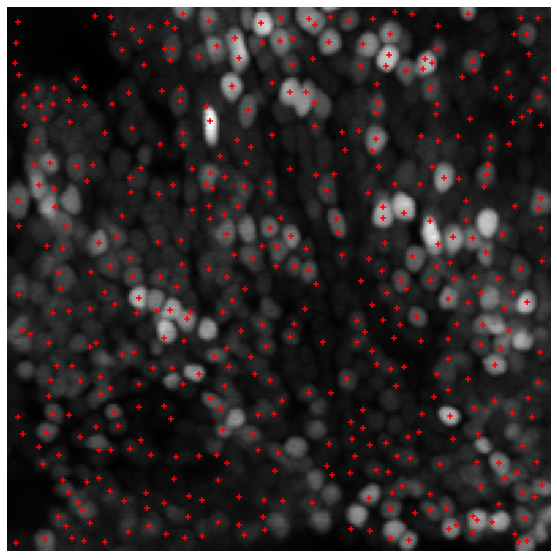

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(results.averageFrame, cmap='gray')
plt.scatter(results.centroids[:, 1], results.centroids[:, 0], marker='+', color=[1,0,0])
plt.axis('off')

**Important**: It may seem like very bright neurons have not been identified by the algorithm. This is usually because the fluorescence is saturated or doesn't fluctuate in time, and therefore is of no use for further analysis.

We can also look the `labels`, where the pixel values correspond to the neuron IDs, and zeros are associated with background. The intensity gradient reflects the order in which components were identified.

(-0.5, 199.5, 199.5, -0.5)

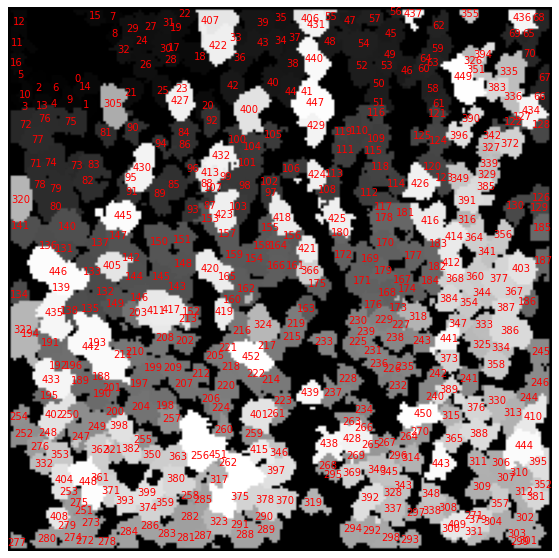

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(results.labels, cmap='gray')
for i in range(results.timeSeries.shape[0]):
    ax.text(results.centroids[i, 1], results.centroids[i, 0], f'{i}', color=[1,0,0], ha='center', va='center', fontsize=10)
ax.axis('off')

The real utility of `labels`, however, is to select the pixels associated with a single neuron, as seen below.

(-0.5, 199.5, 199.5, -0.5)

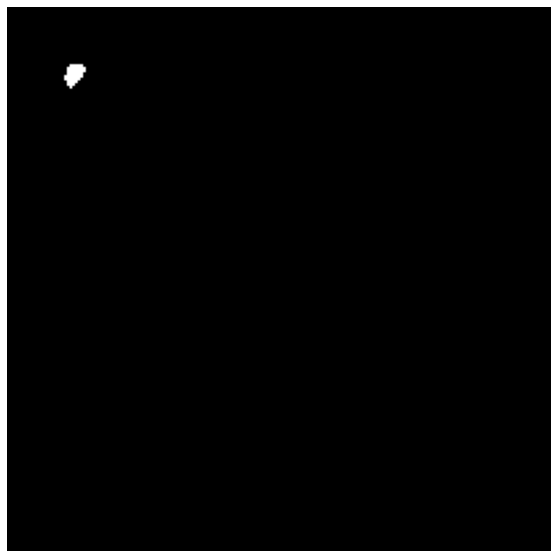

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(results.labels == 1, cmap='gray')
plt.axis('off')

**Important**: The first neuron is associated with the value **1** in the `labels` array, but corresponds to the **0** index in other arrays.

**Important**: The `labels` object is a compact representation of all components within a single frame. However, the segmented components usually overlap and this information is unaccounted for in the single-frame format. To perform rigorous analysis of spatial components, use the `components=True` argument in the `saveResults` method to output a sparse matrix with all individual components.

Now, let's look at the temporal components extracted from each spatial component, which correspond to the `timeSeries`, `deconvolved` and `spikes` attributes. Since the absolute values of these vectors lie in different numerical scales, they are normalized for display.

In [28]:
ID = 120

Text(0.5, 1.0, 'Neuron #120')

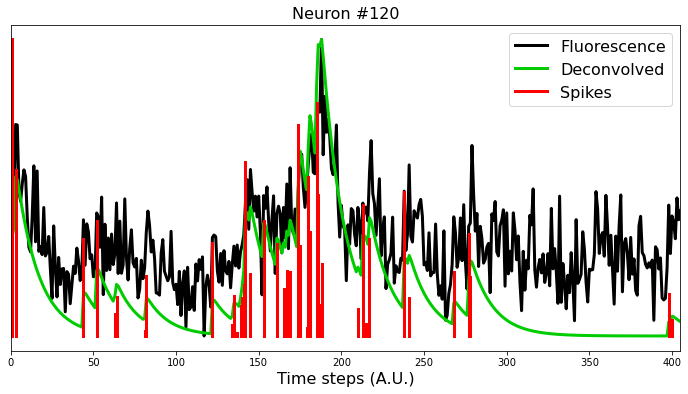

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(normalize(results.timeSeries[ID, :]), linewidth=3, color=[0,0,0], label='Fluorescence')
ax.plot(normalize(results.deconvolved[ID, :]), linewidth=3, color=[0,0.8,0], label='Deconvolved')
spike = np.where(results.spikes[ID, :])[0][0]
plt.plot([spike, spike], [0, normalize(results.spikes[ID, :])[spike]], color=[1,0,0], linewidth=3, label='Spikes')
for spike in np.where(results.spikes[ID, :])[0][1:]:
    plt.plot([spike, spike], [0, normalize(results.spikes[ID, :])[spike]], color=[1,0,0], linewidth=3)
ax.set_yticks([])
ax.set_xlabel('Time steps (A.U.)', fontsize=16)
ax.set_xlim([0, results.timeSeries.shape[1] - 1])
ax.legend(fontsize=16)
ax.set_title(f'Neuron #{ID}', fontsize=16)

### Example: Batch Processing

The following cells offer a quick example of batch processing for multiple experiments, with input films formatted accordingly.

In [17]:
path = '/home/tonepone/Documents/CaimanTest/'
subjects = ['fish1', 'fish2', 'fish3']
experiments = ['spontaneous', 'stimulation']
tag = '_{}_{}'

In [ ]:
for fish in subjects:
    for experiment in experiments:
        caiman = CaImAn(path, 'film' + tag.format(fish, experiment) + '.tif')
        caiman.correctMotion(rigid=False)
        caiman.saveFilm('corrected' + tag.format(fish, experiment) + '.tif')
        caiman.computeSegmentation()
        caiman.saveResults(tag=tag.format(fish, experiment))
        caiman.deleteMemoryMappedFiles()
        caiman.stopCluster()